卷积在 pytorch 中有两种方式，一种是 torch.nn.Conv2d()，一种是torch.nn.functional.conv2d()，这两种形式本质都是使用一个卷积操作这两种形式的卷积对于输入的要求都是一样的，首先需要输入是一个 torch.autograd.Variable() 的类型，大小是 (batch, channel, H, W)，其中 batch 表示输入的一批数据的数目，第二个是输入的通道数，一般一张彩色的图片是 3，灰度图是 1，而卷积网络过程中的通道数比较大，会出现几十到几百的通道数，H 和 W 表示输入图片的高度和宽度，比如一个 batch 是 32 张图片，每张图片是 3 通道，高和宽分别是 50 和 100，那么输入的大小就是 (32, 3, 50, 100)

--------------------- 
作者：fortitude_dj 
来源：CSDN 
原文：https://blog.csdn.net/weixin_40123108/article/details/83510592 
版权声明：本文为博主原创文章，转载请附上博文链接！

In [1]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt

<class 'numpy.ndarray'> (247, 331, 3) 
 (331, 3)
247 331


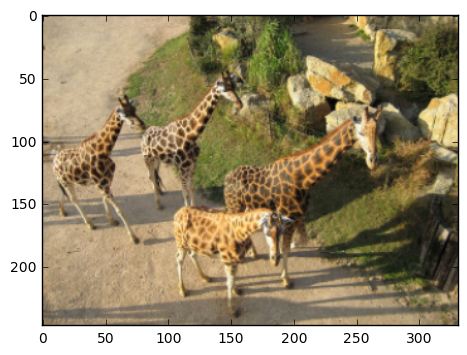

In [2]:
im = Image.open('./example.png').convert('RGB') # 读入一张灰度图的图片
im = np.array(im, dtype='float32') # 将其转换为一个矩阵
print(type(im),im.shape, '\n', im[0].shape)
print(im.shape[0],im.shape[1])     # 448*448
# 可视化图片
plt.imshow(im.astype('uint8'), cmap='gray')
plt.show()

In [3]:
im = torch.from_numpy(im.reshape((1, 3, im.shape[0], im.shape[1])))

# 卷积层

## 使用 nn.Conv2d

im.size(): torch.Size([1, 3, 247, 331])
edge1.size(): torch.Size([1, 1, 245, 329])
<class 'numpy.ndarray'>


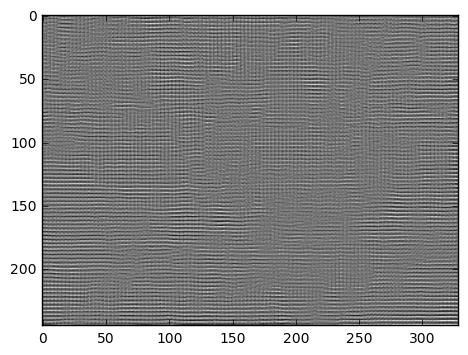

In [4]:
conv1 = nn.Conv2d(4, 1, 3, bias=False) # 定义卷积

sobel_kernel = np.array([[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]], dtype='float32') # 定义轮廓检测算子
sobel_kernel = sobel_kernel.reshape((1, 3, 3, 3)) # 适配卷积的输入输出
conv1.weight.data = torch.from_numpy(sobel_kernel) # 给卷积的 kernel 赋值
print('im.size():',im.size())
edge1 = conv1(Variable(im)) # 作用在图片上
print('edge1.size():',edge1.size())
edge1 = edge1.data.squeeze().numpy() # 将输出转换为图片的格式
print(type(edge1))
plt.imshow(edge1, cmap='gray')
plt.show()

In [20]:
edge2 = torch.from_numpy(edge1.reshape(1,1,edge1.shape[0],edge1.shape[1]))
print(edge2.size())
edge2 = conv1(edge2) # 作用在图片上
print(edge2.size())
edge2 = edge2.data.squeeze().numpy() # 将输出转换为图片的格式
plt.imshow(edge2, cmap='gray')
plt.show()

torch.Size([1, 1, 245, 329])


RuntimeError: Given groups=1, weight of size [1, 3, 3, 3], expected input[1, 1, 245, 329] to have 3 channels, but got 1 channels instead

## 使用 F.conv2d

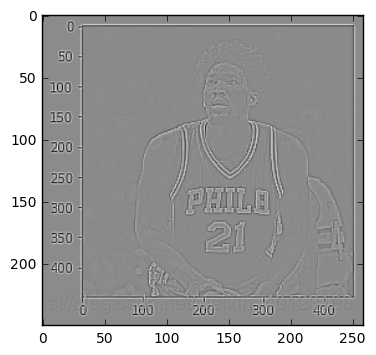

In [6]:
sobel_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype='float32') # 定义轮廓检测算子
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3)) # 适配卷积的输入输出
weight = Variable(torch.from_numpy(sobel_kernel))

edge2 = F.conv2d(Variable(im), weight) # 作用在图片上
edge2 = edge2.data.squeeze().numpy() # 将输出转换为图片的格式
plt.imshow(edge2, cmap='gray')
plt.show()

# 池化层

before max pool, image shape: 252 x 261
after max pool, image shape: 126 x 130 


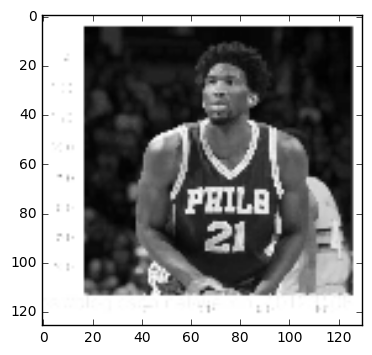

In [7]:
pool1 = nn.MaxPool2d(2, 2)
print('before max pool, image shape: {} x {}'.format(im.shape[2], im.shape[3]))
small_im1 = pool1(Variable(im))
small_im1 = small_im1.data.squeeze().numpy()
print('after max pool, image shape: {} x {} '.format(small_im1.shape[0], small_im1.shape[1]))
plt.imshow(small_im1, cmap='gray')
plt.show()

### 在实际应用中加入基层激活函数以及卷积层池化层的应用

(62, 64)


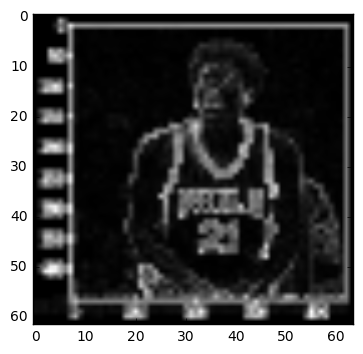

In [8]:
conv1 = nn.Conv2d(1, 1, 3, bias=False) # 定义卷积

sobel_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype='float32') # 定义轮廓检测算子
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3)) # 适配卷积的输入输出
conv1.weight.data = torch.from_numpy(sobel_kernel) # 给卷积的 kernel 赋值

edge1 = conv1(Variable(im)) # 作用在图片上
x=F.relu(edge1)
x=F.relu(x)
x=F.relu(x)#加入三层激活函数
pool1 = nn.MaxPool2d(2, 2)
x = pool1(Variable(x))
x = pool1(Variable(x))#加入两层池化
#edge2 = x.data.squeeze().numpy()
x = x.data.squeeze().numpy()
print(x.shape)#输出大小

plt.imshow(x, cmap='gray')
plt.show()